In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import os

In [4]:
from lwb_smr.predict import PredictRoof

In [5]:
pred_roof = PredictRoof()
pred_roof.tile_split()

completed tiling prediction_input_image


In [7]:
pred_roof.load_model();

In [8]:
roof_images = pred_roof.perform_prediction()

13/13 [==============================] - 83s 6s/step


In [9]:
%%time
pred_roof.output_mask(roof_images)

CPU times: user 827 ms, sys: 109 ms, total: 936 ms
Wall time: 934 ms


In [31]:
%%time
from lwb_smr.predict import PredictRoof
pred_roof = PredictRoof()
pred_roof.tile_split('austin3.tif')
roof_images = pred_roof.perform_prediction('Josh_model_vertexAI_08_FULL_dataset_BCE.h5')
pred_roof.output_mask(roof_images)

completed tiling prediction_input_image
13/13 [==============================] - 82s 6s/step
CPU times: user 18min 43s, sys: 1min 47s, total: 20min 31s
Wall time: 1min 24s


In [96]:
pred_roof.output_mask(roof_images)

In [30]:
%%time
from lwb_smr.predict import PredictRoof
pred_roof_google = PredictRoof()
pred_roof_google.tile_split('lewagon_london.jpg',256,256)
roof_images_google = pred_roof_google.perform_prediction('Josh_model_vertexAI_08_FULL_dataset_BCE.h5')
pred_roof_google.output_mask(roof_images_google)

completed tiling prediction_input_image
1/1 [==============================] - 5s 5s/step
CPU times: user 1min 10s, sys: 6.84 s, total: 1min 17s
Wall time: 6.18 s


In [6]:
roof_images_google.shape

(400, 224, 224, 1)

In [ ]:
roof_image

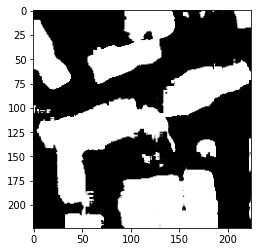

In [5]:
import matplotlib.pyplot as plt
plt.imshow(roof_images_google[0], cmap="gray")

In [98]:
image = Image.open("../../raw_data/prediction/lewagon_london.jpg")

In [100]:
image.size

(1280, 1280)

In [101]:
image = np.asarray(image)
image.shape

(1280, 1280)

In [94]:
background = Image.open("../../raw_data/prediction/austin3.tif")
maskimg = Image.open("../../raw_data/prediction/predicted_tiles_output/output_mask.jpg")
maskimg = ImageOps.invert(maskimg)
foreground = maskimg
# Image.alpha_composite(background, foreground)
background.paste(foreground, (0, 0), foreground)
# background.show()

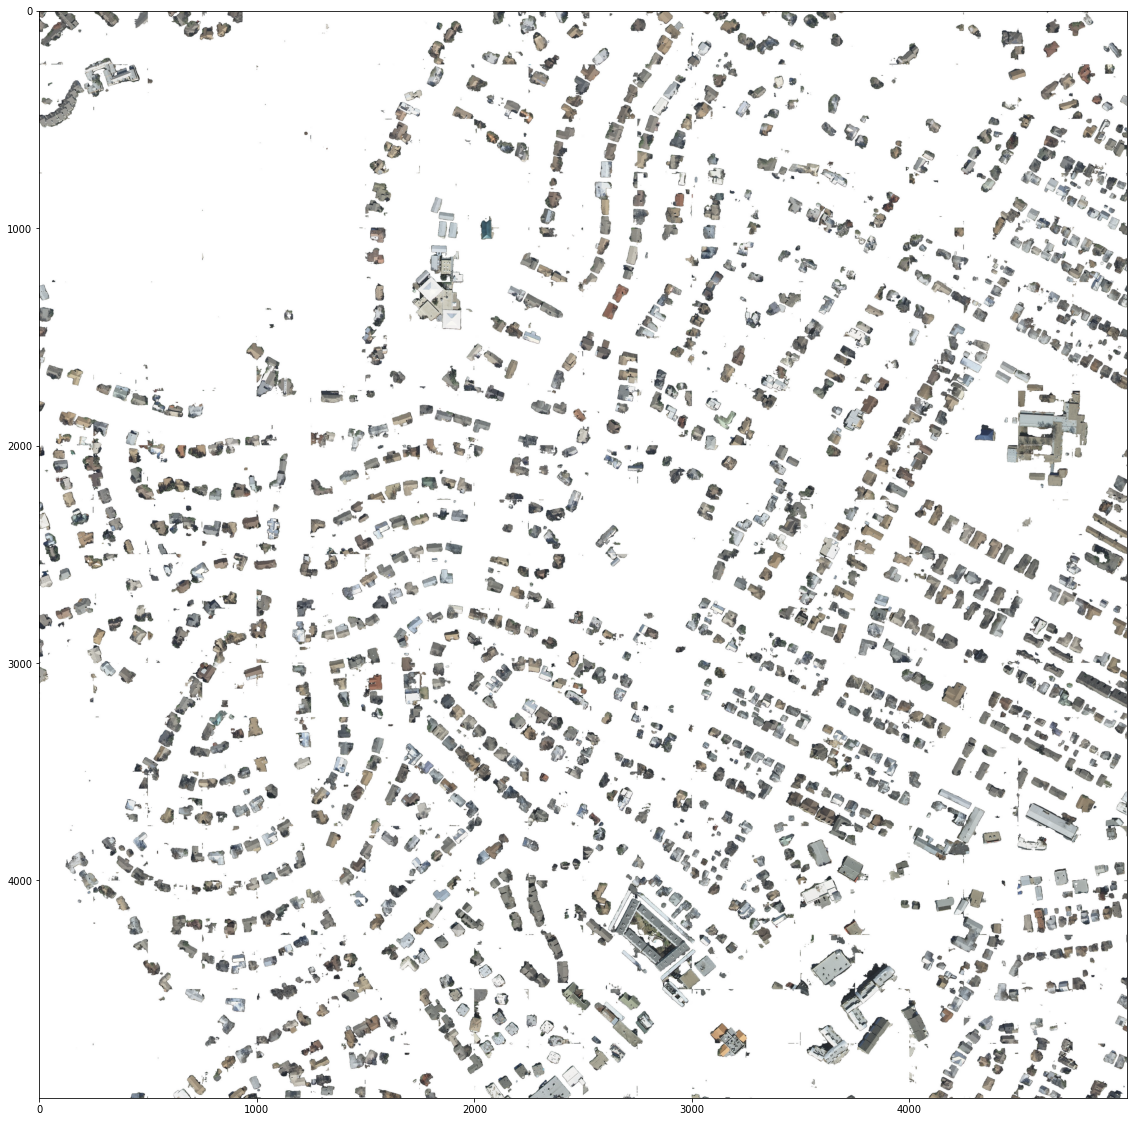

In [95]:
plt.figure(figsize=(20,20))
plt.imshow(background)

In [79]:
# pred_roof.resized_big_image

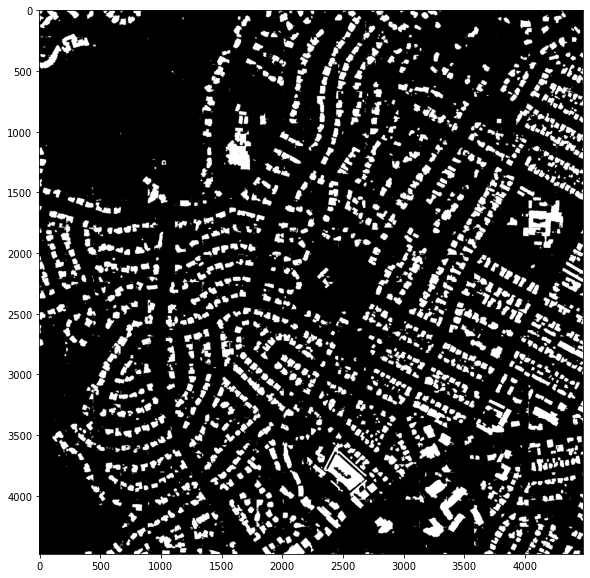

In [25]:
#number of images in each dim :
nh = 20 # a choice
nw=20
h = 224
w = 224

bigim=roof_images.reshape(nh,nw,h,w).swapaxes(1,2).reshape(nh*h,nw*w)
# figure() 
plt.figure(figsize=(10,10))
plt.imshow(bigim,cmap="gray");

In [26]:
bigim.shape

(4480, 4480)

In [28]:
from skimage.transform import resize
bigim5k = resize(bigim, (5000, 5000))

In [29]:
bigim5k.shape

(5000, 5000)

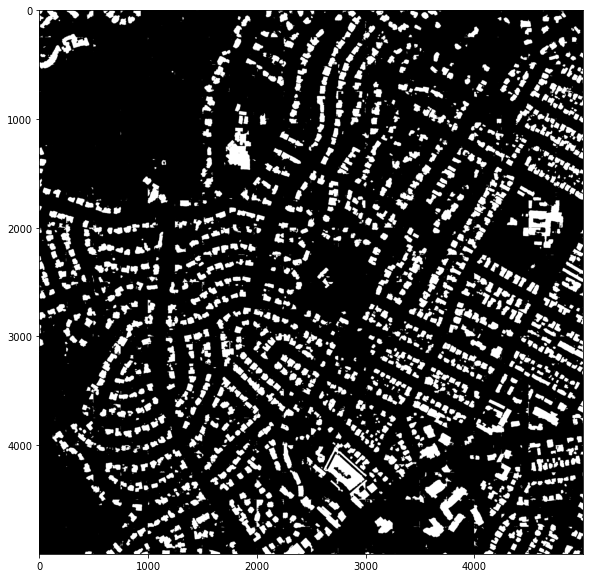

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(bigim5k,cmap="gray")

In [34]:
bigim5k.shape

(5000, 5000)

In [62]:
bigim5k.mode

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [37]:
bigim5k[0]

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 9.2557237e-08,
       3.3859018e-07, 2.5037497e-07], dtype=float32)

In [57]:
im = Image.fromarray(bigim5k*255)

In [64]:
imagergb = im.convert("RGB")

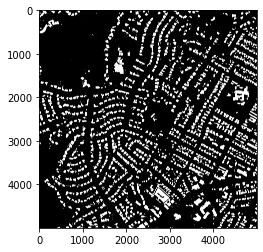

In [65]:
plt.imshow(imagergb)

In [67]:
imagergb.save("../../raw_data/prediction/predicted_tiles_output/bigtileout.png")

In [63]:
im.mode

'F'

In [52]:
im.save("../../raw_data/prediction/predicted_tiles_output/bigtileout.jpg", im)

AttributeError: upper

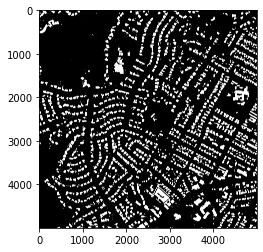

In [53]:
plt.imshow(im);

In [75]:
Image.save(roof_images[0])

AttributeError: module 'PIL.Image' has no attribute 'save'

In [12]:
im = roof_images[0]*255

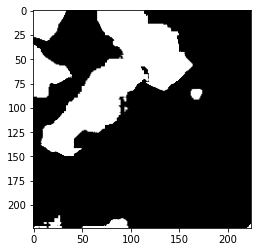

In [15]:
plt.imshow(im,cmap="gray");

In [85]:
# im

In [88]:
im = Image.fromarray((roof_images[0] * 255).astype(np.uint8))

TypeError: Cannot handle this data type: (1, 1, 1), |u1

In [72]:
# pred_roof.output_tiles()

In [10]:
type(roof_images)

numpy.ndarray

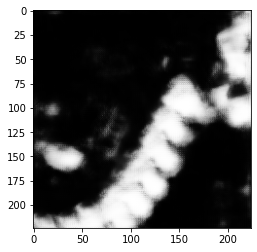

In [21]:
plt.imshow(roof_images[20],cmap="gray");

In [18]:
reshaped = np.zeros((400,400))
reshaped.shape

(400, 400)

In [33]:
reshaped = np.concatenate((roof_images[20],roof_images[21],roof_images[22],roof_images[23],roof_images[24]),axis=1)

In [ ]:
for x in range(20):
    

In [42]:
shape_test = roof_images.reshape((4480,4480,1))

In [43]:
shape_test.shape

(4480, 4480, 1)

In [62]:
xy = []
reshaped = roof_images[0]
for j in range(19):
    reshaped = roof_images[j*20]
    for i in range(19):
        reshaped = np.concatenate((reshaped,roof_images[(i+1)+j]),axis=1)
    xy.append(reshaped)


In [54]:
xy[0].shape

(224, 4480, 1)

In [55]:
xy[2].shape

(224, 4480, 1)

In [ ]:
rows2

In [63]:
row2 = np.vstack((xy[0],xy[2],xy[3]))

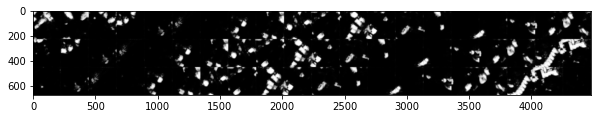

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(row2,cmap="gray");

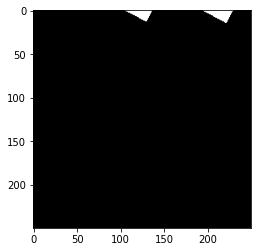

In [38]:
mask1 = "../../raw_data/tiled_test_images/austin1_mask_x00_y00.tif"
mask1 = Image.open(mask1)
plt.imshow(mask1,cmap="gray")

In [51]:
!pwd

/home/joshk/code/lwb_smr/lwb_smr/notebooks/day5


In [56]:
image01 = "../../raw_data/prediction/raw_image_tiles/prediction_input_image_x00_y00.jpg"
image02 = "../../raw_data/prediction/raw_image_tiles/prediction_input_image_x00_y01.jpg"
image01 = Image.open(image01)
image02 = Image.open(image02)

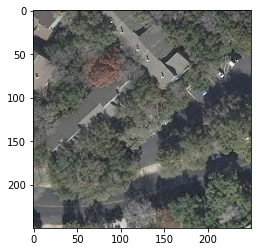

In [57]:
plt.subplots(1,2,1)
plt.imshow(image01)
plt.subplots()

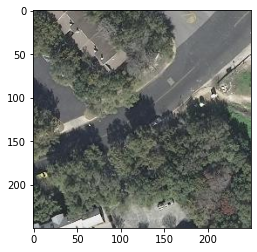

In [58]:
plt.imshow(image02);

In [60]:
mask = "../../raw_data/gt_examples/austin3.tif"

In [66]:
roof_images[0][0][0]

array([0.11264044], dtype=float32)

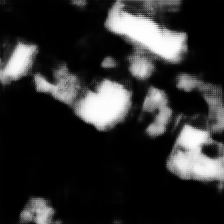

In [76]:
roof_squeeze = np.squeeze(roof_images[0],axis=2)
im = Image.fromarray((roof_squeeze*255).astype(np.uint8))
im

In [77]:
for img in range(roof_images.shape[0]):
    tile_name = f"output_mask_{img:02d}.jpg"
    squeeze = np.squeeze(roof_images[img],axis=2)
    im = Image.fromarray((squeeze*255).astype(np.uint8))
    im.save("../../raw_data/prediction/predicted_tiles_output/"+tile_name)

In [5]:
image = Image.open("../../raw_data/prediction/austin3.tif")
image.mode

'RGB'

In [31]:
image = Image.open("../../raw_data/prediction/lewagon_london.jpg")
image.mode

'P'

In [32]:
if image.mode != "RGB":
    image = image.convert("RGB")
image.size

(1280, 1280)

In [33]:
image.mode

'RGB'

In [34]:
image = np.asarray(image)

In [35]:
image.shape

(1280, 1280, 3)

In [36]:
image.shape[0]

1280

In [10]:
import glob
import os

In [11]:
clean_files = glob.glob("../../raw_data/prediction/raw_image_tiles/*")
for f in clean_files:
    os.remove(f)